<a href="https://colab.research.google.com/github/YaraAlnaggar/unsupervised-deep-learning_cs294-158_assignments/blob/master/gan/Inception_cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch 
from torch import nn, optim
import torchvision
import torch.nn.functional as F
from torchvision import datasets,transforms
from torch.utils.data import DataLoader
import numpy as np
from numpy import log
import matplotlib.pyplot as plt

device = torch.device("cuda:0") if torch.cuda.is_available() else torch.device("cpu")

In [0]:
inception_model = torchvision.models.inception.inception_v3(pretrained=False, transform_input=False, progress=True, num_classes=10,aux_logits=False).to(device)

In [0]:
IMAGE_SIZE = 99
padding = (299-IMAGE_SIZE)//2
print(padding)
transform = transforms.Compose(
    [transforms.Resize(IMAGE_SIZE),
     transforms.Pad(padding),
     transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5),(0.5, 0.5, 0.5))])
cifar_train = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
cifar_val = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

100


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [0]:
batch_size = 32
epochs_num = 20
train_loader = DataLoader(cifar_train, batch_size = batch_size ,shuffle = True)
val_loader = DataLoader(cifar_val, batch_size = batch_size ,shuffle = False)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([32, 3, 299, 299])


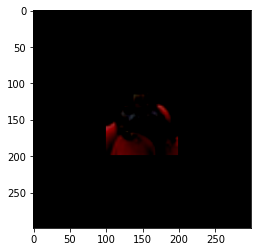

In [0]:
batch = next(iter(train_loader))
print(batch[0].size())
plt.imshow(batch[0][0].permute(1,2,0).numpy())
# get_inception_score(inception_model, batch)

In [0]:
criterion = nn.CrossEntropyLoss().to(device)
optimizer = optim.Adam(inception_model.parameters())
epoch_start = 0

In [0]:
def accuracy(pred,label):
  label_pred = torch.argmax(pred, dim=1)
  result = label_pred == label
  return result.float().sum()/result.size()[0]

In [0]:
# ## restore model
# checkpoint = torch.load("/content/drive/My Drive/inception_cifar10.tar")
# inception_model.load_state_dict(checkpoint["model"])
# optimizer.load_state_dict(checkpoint["optimizer"])
# epoch_start = checkpoint["epoch"]

In [10]:
train_loss, val_loss = [],[]
for epoch in range(0,epochs_num):
  loss_d,acc_d = 0, 0
  inception_model.train()
  for step, (data,labels) in enumerate(train_loader,1):
    optimizer.zero_grad()
    pred = inception_model(data.to(device))
    loss = criterion(pred,labels.to(device))
    loss_d+=loss.item()
    acc_d+=accuracy(pred,labels.to(device)).data
    loss.backward()
    optimizer.step()

    if step%500 == 0: print("step ",step) 
  print("Epoch {} |loss {:.3f}| accuracy {:0.3f}".format(epoch, loss_d/step, acc_d/step))
  train_loss.append(loss_d/step)
  loss_val,acc_val = 0, 0
  inception_model.eval()
  for step, (data,labels) in enumerate(val_loader,1):
    pred = inception_model(data.to(device))
    loss = criterion(pred,labels.to(device))
    loss_val +=loss.item()
    acc_val+= accuracy(pred, labels.to(device))
  print("Val loss {:.3f}| accuracy {:.3f}".format(loss_val/step, acc_val/step))
  val_loss.append(loss_val/step)
  # model_save_name = 'inception_cifar10_graph.tar' 
  # path = F"/content/drive/My Drive/{model_save_name}"
  # state_dict = {"model": inception_model.state_dict(), "optimizer": optimizer.state_dict(), "epoch":epoch,"train_loss":train_loss,"val_loss":val_loss}
  # torch.save(state_dict, path)
  # print("saved successfuly")

step  500
step  1000
step  1500
Epoch 1 |loss 1.667| accuracy 0.420
Val loss 1.356| accuracy 0.524
saved successfuly
step  500
step  1000
step  1500
Epoch 2 |loss 1.094| accuracy 0.615
Val loss 1.093| accuracy 0.625
saved successfuly
step  500
step  1000
step  1500
Epoch 3 |loss 0.864| accuracy 0.701
Val loss 0.915| accuracy 0.691
saved successfuly
step  500
step  1000
step  1500
Epoch 4 |loss 0.743| accuracy 0.747
Val loss 1.880| accuracy 0.497
saved successfuly
step  500
step  1000
step  1500
Epoch 5 |loss 0.636| accuracy 0.783
Val loss 0.564| accuracy 0.803
saved successfuly
step  500
step  1000
step  1500
Epoch 6 |loss 0.565| accuracy 0.807
Val loss 0.780| accuracy 0.744
saved successfuly
step  500
step  1000
step  1500
Epoch 7 |loss 0.500| accuracy 0.831
Val loss 0.558| accuracy 0.811
saved successfuly
step  500
step  1000
step  1500
Epoch 8 |loss 0.440| accuracy 0.850
Val loss 0.901| accuracy 0.728
saved successfuly
step  500
step  1000
step  1500
Epoch 9 |loss 0.409| accuracy 0.

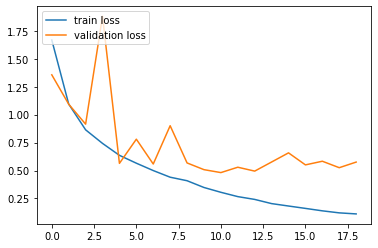

In [17]:
plt.plot(np.arange(epochs_num),train_loss, label = "train loss")
plt.plot(np.arange(epochs_num),val_loss, label = "validation loss")
plt.legend(loc='upper left')
plt.show()